## 105. Construct Binary Tree from Preorder and Inorder Traversal

<div class="elfjS" data-track-load="description_content"><p>Given two integer arrays <code>preorder</code> and <code>inorder</code> where <code>preorder</code> is the preorder traversal of a binary tree and <code>inorder</code> is the inorder traversal of the same tree, construct and return <em>the binary tree</em>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/02/19/tree.jpg" style="width: 277px; height: 302px;">
<pre><strong>Input:</strong> preorder = [3,9,20,15,7], inorder = [9,3,15,20,7]
<strong>Output:</strong> [3,9,20,null,null,15,7]
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre><strong>Input:</strong> preorder = [-1], inorder = [-1]
<strong>Output:</strong> [-1]
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= preorder.length &lt;= 3000</code></li>
	<li><code>inorder.length == preorder.length</code></li>
	<li><code>-3000 &lt;= preorder[i], inorder[i] &lt;= 3000</code></li>
	<li><code>preorder</code> and <code>inorder</code> consist of <strong>unique</strong> values.</li>
	<li>Each value of <code>inorder</code> also appears in <code>preorder</code>.</li>
	<li><code>preorder</code> is <strong>guaranteed</strong> to be the preorder traversal of the tree.</li>
	<li><code>inorder</code> is <strong>guaranteed</strong> to be the inorder traversal of the tree.</li>
</ul>
</div>

In [1]:
import numpy as np
from typing import List, Optional
%load_ext memory_magics

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [2]:
from graphviz import Digraph
from collections import deque 

def plot_tree(node, graph=None, node_id=0):
    if graph is None:
        graph = Digraph()
        graph.attr(size='8,8')
    if node is not None:
        graph.node(str(node_id), str(node.val))
        if node.left:
            graph.edge(str(node_id), str(2 * node_id + 1))
            plot_tree(node.left, graph, 2 * node_id + 1)
        if node.right:
            graph.edge(str(node_id), str(2 * node_id + 2))
            plot_tree(node.right, graph, 2 * node_id + 2)
    return graph

## Solution 1
<!-- class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> Optional[TreeNode]:
        from collections import deque
        iter_values = iter(preorder )
        iter_inorder = iter(inorder)
        root = TreeNode(next(iter_values))
        queue = deque([root])
        while queue:
            node = queue.popleft()
            try:
                left_val = next(iter_values)
                inorder_val = next(iter_inorder)
                if left_val is not None:
                    if left_val == inorder_val:
                        node.left = TreeNode(left_val)
                        queue.append(node.left)
                        _ =  next(iter_inorder)
                        
                right_val = next(iter_values)
                inorder_val = next(iter_inorder)
                if right_val is not None:
                    if left_val == inorder_val:
                        node.right = TreeNode(right_val)
                        queue.append(node.right)
                    else:
                        node.right = None
                        
            except StopIteration:
                break -->

In [3]:

class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> Optional[TreeNode]:
        if not preorder or not inorder:
            return None
        
        # The first element in preorder is always the root
        root_val = preorder.pop(0)
        root = TreeNode(root_val)
        
        # Find the index of the root in inorder to split left and right subtrees
        index = inorder.index(root_val)
        
        # Recursively build the left and right subtree
        root.left = self.buildTree(preorder, inorder[:index])
        root.right = self.buildTree(preorder, inorder[index+1:])
        
        return root

In [4]:
%%time
preorder = [3,9,20,15,7]
inorder = [9,3,15,20,7]
solution = Solution()
tree1 = solution.buildTree(preorder, inorder)

CPU times: user 22 µs, sys: 1 µs, total: 23 µs
Wall time: 27.2 µs


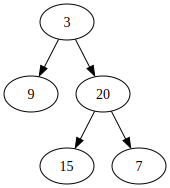

In [5]:

plot_tree(tree1)